이미지 다운받기

In [1]:
import os
from PIL import Image
import requests

image_url = ('https://ee5817f8e2e9a2e34042-3365e7f0719651e5b'
             '8d0979bce83c558.ssl.cf5.rackcdn.com/python.png')
image = requests.get(image_url).content
filename = os.path.basename(image_url)
with open(filename, 'wb') as f:
    f.write(image)

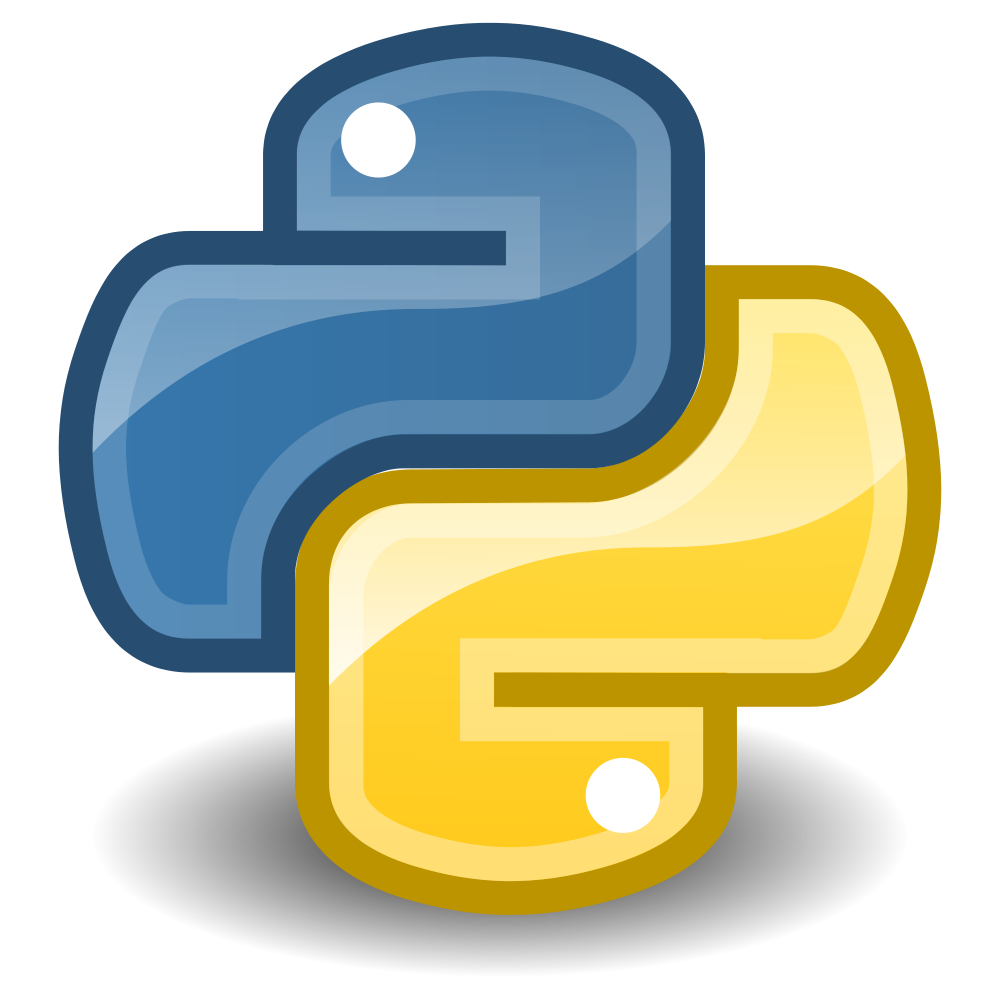

In [2]:
from IPython.display import Image
Image(filename='python.png')

# 이미지 품질 낮추기

In [11]:
from PIL import Image as PILImage #Pillow

In [20]:
with PILImage.open('python.png') as im:
    # im.save('python_quality_40.jpg', quality=40)
    
    with PILImage.new('RGBA', im.size, (255, 255, 255)) as canvas:
        merged_im = PILImage.alpha_composite(canvas, im)
        merged_im = merged_im.convert('RGB')
        merged_im.save('python_bg_white.jpg', quality=80)

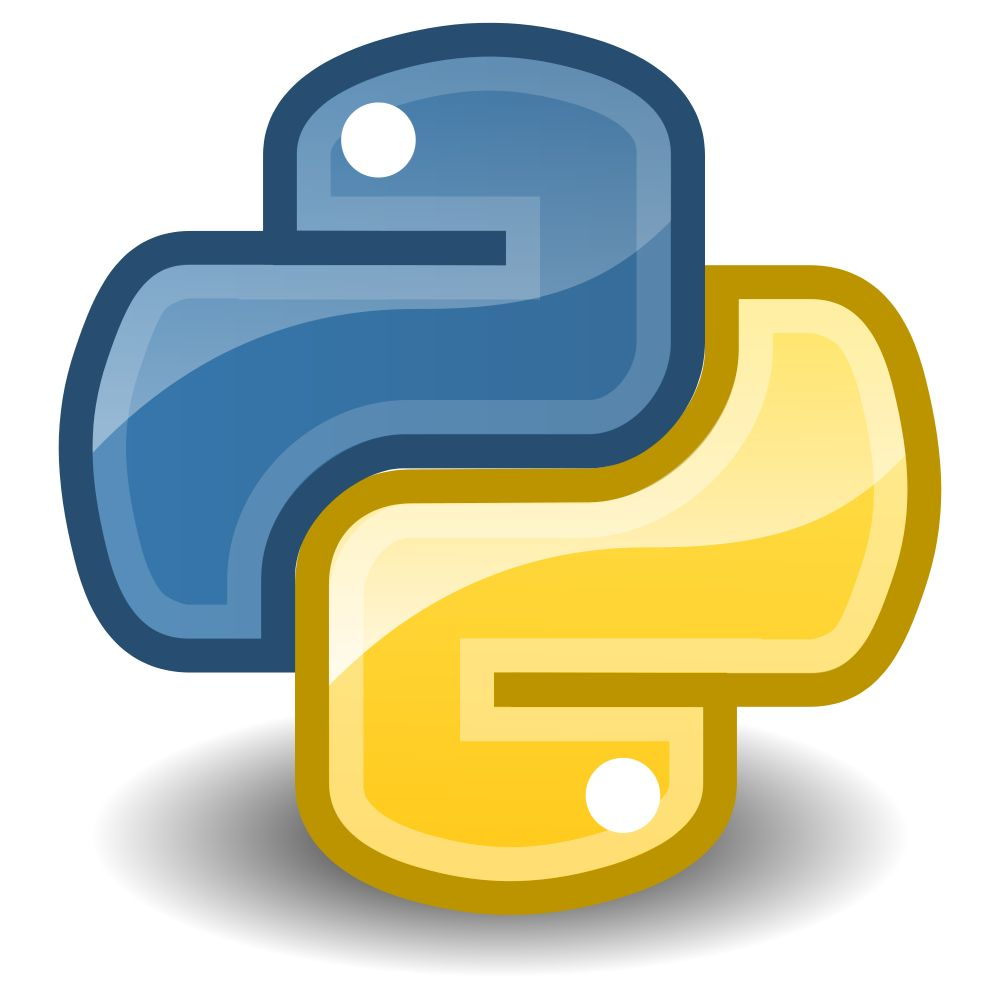

In [21]:
from IPython.display import Image
Image(filename='python_bg_white.jpg')

# 이미지 가로세로 크기 줄이기

In [23]:
from PIL import Image
with Image.open('python.png') as im:
    print('current size : {}'.format(im.size))
    im.thumbnail((300, 300))
    im.save('python3_thumb.png')

current size : (1000, 1000)


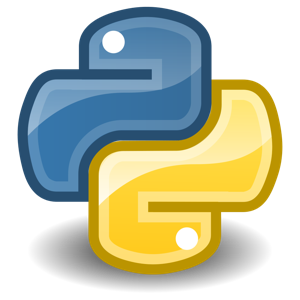

In [24]:
from IPython.display import Image
Image(filename='python3_thumb.png')

# 이미지 이어 붙이기

In [26]:
from PIL import Image
WHITE = (255, 255, 255)
with Image.open('python.png') as im1:
    with Image.open('python3_thumb.png') as im2:
        width = max(im1.width, im2.width)
        height = sum((im1.height, im2.height))
        size = (width, height)
        
        with Image.new('RGB', size, WHITE) as canvas:
            canvas.paste(im1, box=(0,0))
            canvas.paste(im2, box=(0,im1.height))
            canvas.save('canvas.jpg')

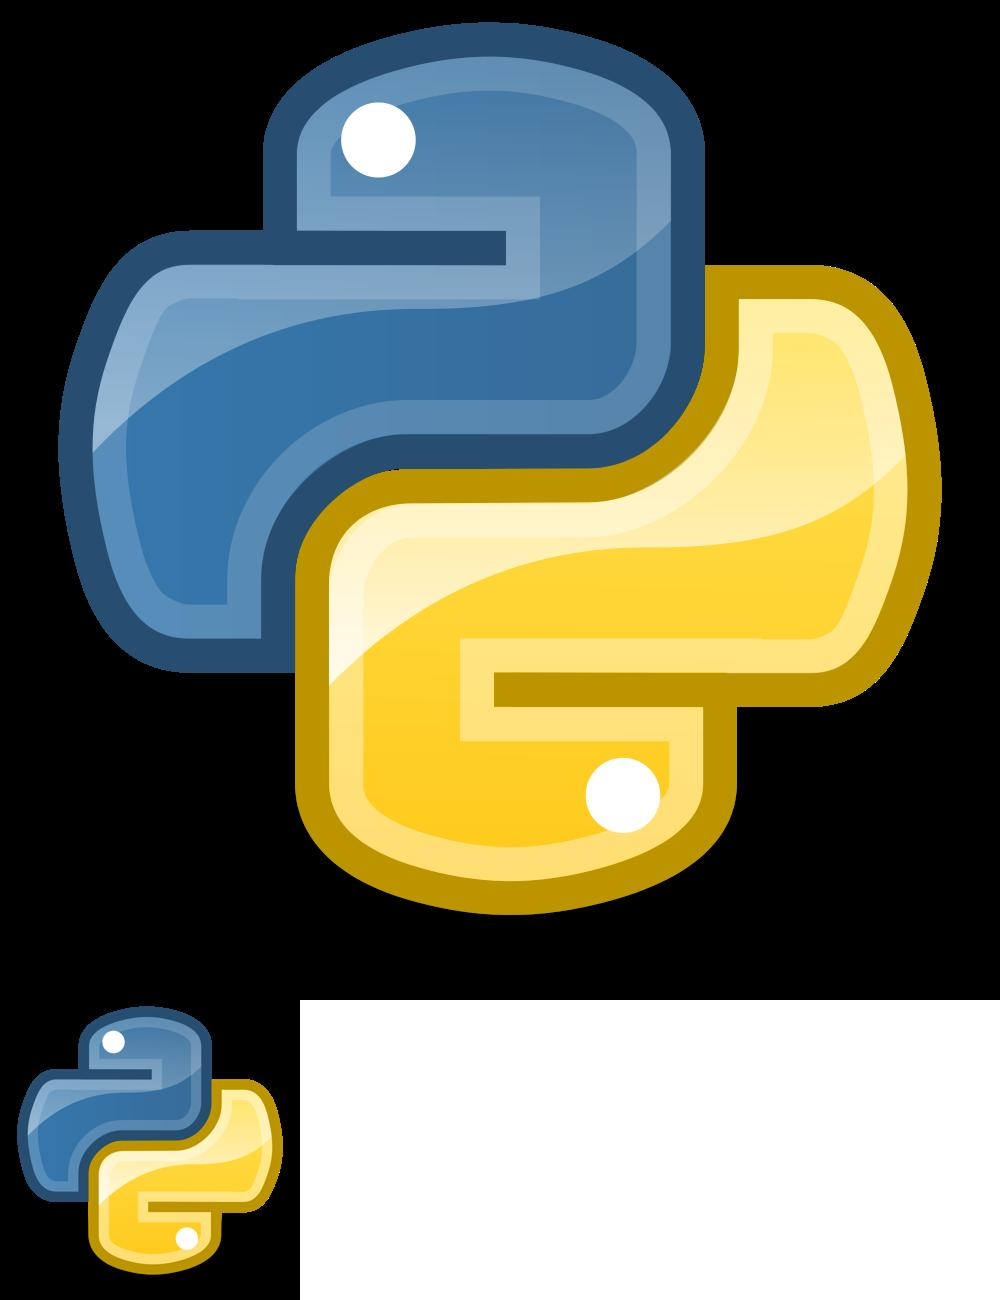

In [27]:
from IPython.display import Image
Image(filename='canvas.jpg')

# 네이버웹툰 하나의 파일로 합치기

In [28]:
img1_url = "https://image-comic.pstatic.net/webtoon/20853/1093/20170529163407_0ed8a697d896451fee4bc3642fb46db8_IMAG01_3.jpg"
img2_url = "https://image-comic.pstatic.net/webtoon/20853/1093/20170529163407_0ed8a697d896451fee4bc3642fb46db8_IMAG01_4.jpg"

In [30]:
import requests
headers = {
    'Referer' : 'https://comic.naver.com/webtoon/detail.nhn?titleId=20853&no=1093&weekday=tue',
}
img1_data = requests.get(img1_url, headers = headers).content
img2_data = requests.get(img2_url, headers = headers).content

In [32]:
with open('img1.jpg', 'wb') as f:
    f.write(img1_data)
    
with open('img2.jpg', 'wb') as f:
    f.write(img2_data)

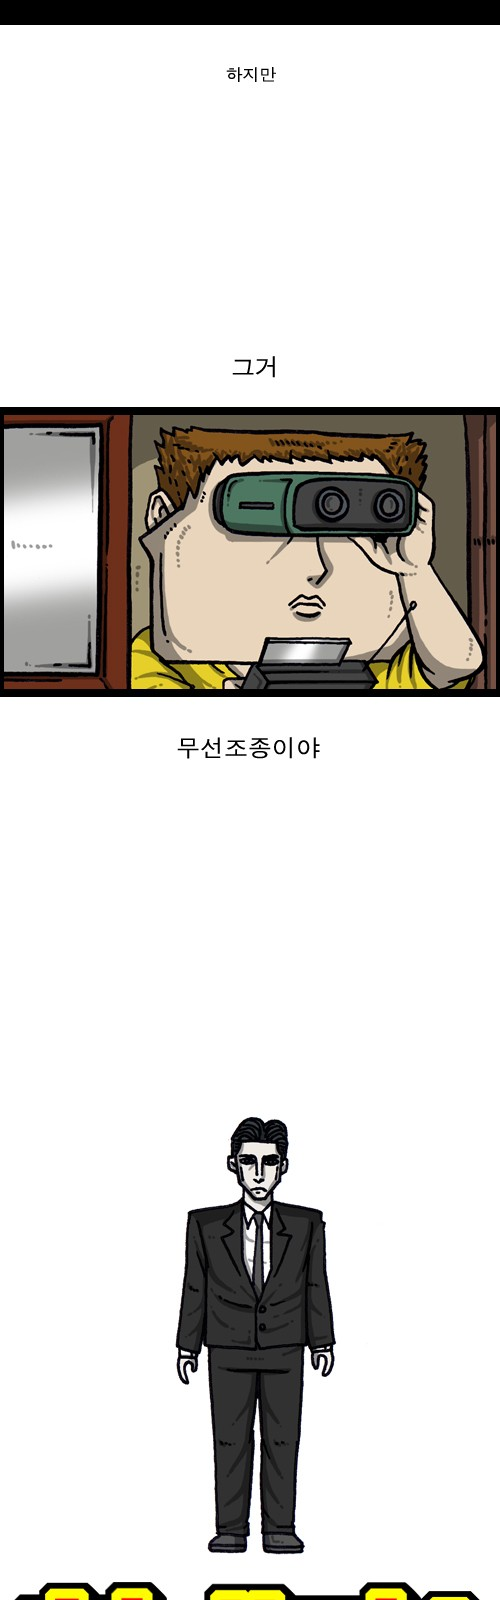

In [33]:
Image(filename='img1.jpg')

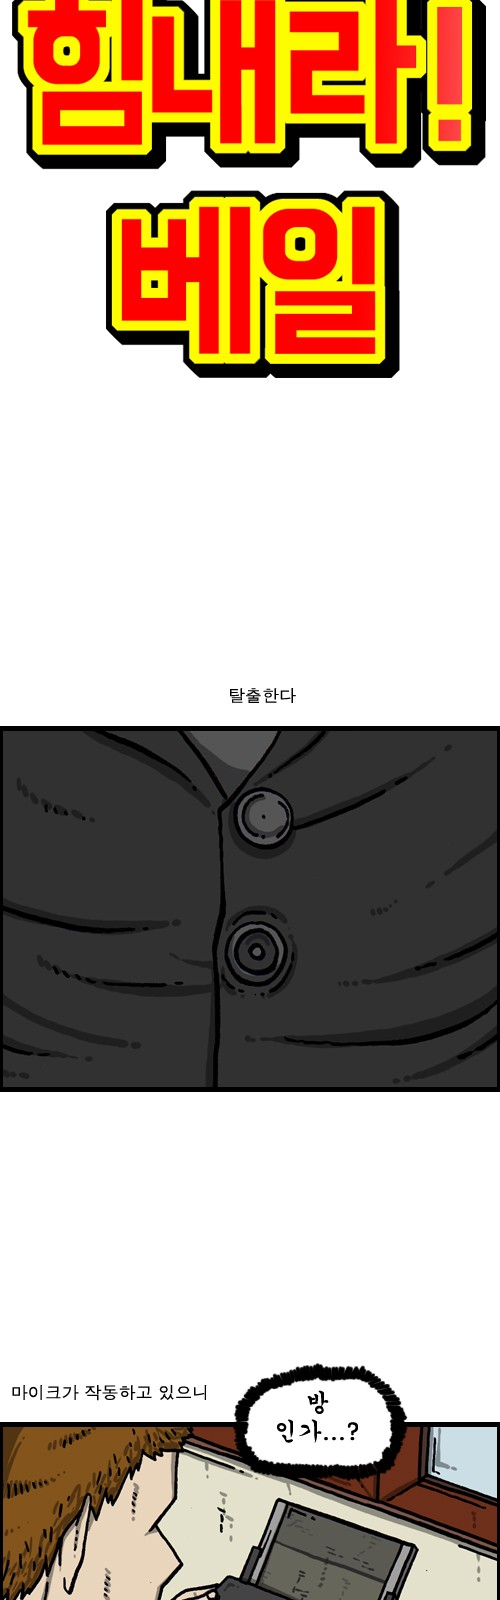

In [34]:
Image(filename='img2.jpg')

In [38]:
from PIL import Image as PILImage
with PILImage.open('img1.jpg') as im1:
    with PILImage.open("img2.jpg") as im2:
        width = max(im1.width, im2.width)
        height = sum((im1.height, im2.height))
        with PILImage.new('RGB', (width,height), (255,255,255)) as canvas:
            canvas.paste(im1, box=(0,0))
            canvas.paste(im2, box=(0,im1.height))
            canvas.save('img_merged.jpg')
            

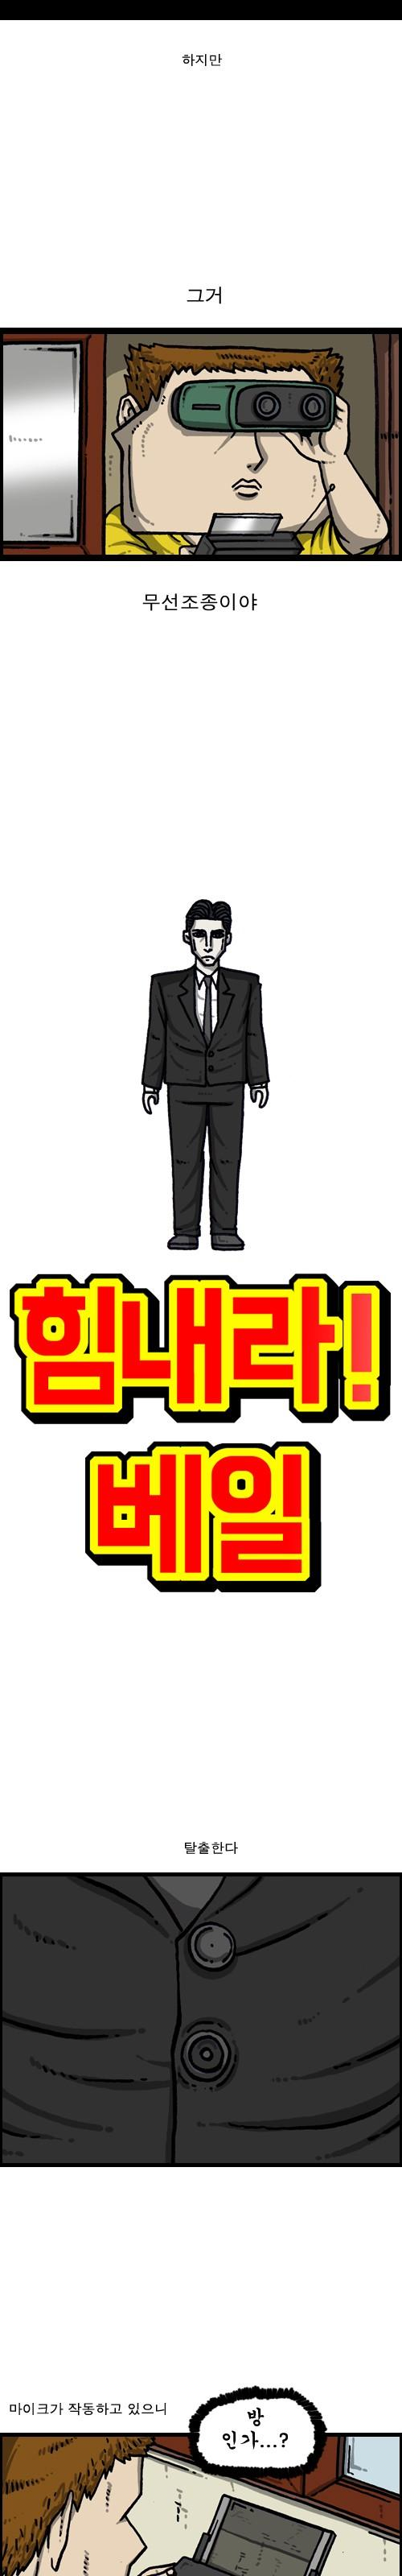

In [39]:
Image(filename='img_merged.jpg')

# 네이버웹툰 하나의 파일로 합치기

In [90]:
import os
import requests
from PIL import Image as PILImage
from IPython.display import Image
from bs4 import BeautifulSoup

ep_url = 'https://comic.naver.com/webtoon/detail.nhn?titleId=20853&no=1093&weekday=tue'
html = requests.get(ep_url).text
soup = BeautifulSoup(html, 'html.parser')
width = 1000
height = 60000
with PILImage.new('RGBA', (width,height), (255,255,255)) as canvas:
    width = 0
    height = 0
    for tag in soup.select('.wt_viewer img'):
        img_url = tag['src']
        img_name = os.path.basename(img_url)
        headers = {'Referer' : ep_url}
        img_data = requests.get(img_url, headers = headers).content
        
        with open(img_name, 'wb') as f:
            f.write(img_data)
        with PILImage.open(img_name) as im:
            canvas.paste(im, box=(0, height))
            width = max(width, im.width)
            height = sum((height, im.height))

    canvas.save('canvas.png')

In [95]:
with PILImage.open('canvas.png') as img:
    area=(0,0,width,height)
    img = img.crop(area)
    img.show()